# Tüm Modelleri Karşılaştırma

Bu zamana kadar kullandığımız tüm modelleri birlikte kullanıp hepsinin doğruluklarını karşılaştırıcaz

In [14]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from warnings import filterwarnings
filterwarnings('ignore')

In [18]:
diabet=pd.read_csv("diabetes.csv")
df=diabet.copy()
df=df.dropna()
y=df["Outcome"]
X=df.drop(["Outcome"],axis=1)
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.30, random_state=42) 

# modelleri kuralım

In [31]:
#LOGİSTİC REGRESSİON

from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()
logistic.fit(X_train,y_train)

LogisticRegression()

In [33]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB
naive=GaussianNB()
naive.fit(X_train,y_train)

GaussianNB()

In [35]:
# KNN

knn=KNeighborsClassifier()
params={"n_neighbors":np.arange(1,30,1)}
knn_cv=GridSearchCV(knn,params,cv=10)
knn_cv.fit(X_train,y_train)
knn_cv.best_params_
knn_tuned=KNeighborsClassifier(n_neighbors=11)
knn_tuned.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [7]:
# SVC  LİNEAR

svc_linear=SVC(kernel="linear")
params={"C":np.arange(1,10)}
svc_cv=GridSearchCV(svc_linear,params,cv=10,n_jobs=-1,verbose=2)
svc_cv.fit(X_train,y_train)
svc_cv.best_params_
svc_linear_tuned=SVC(C=1)
svc_linear_tuned.fit(X_train,y_train)


SVC(C=1)

In [10]:
# SVC RBF

svc_rbf=SVC()
params={"C":[0.0001, 0.001, 0.1, 1,5,10,50, 100],
        "gamma":[0.0001, 0.001, 0.1, 1,5,10,50, 100]}
scv_rbf_cv=GridSearchCV(svc_rbf,params,cv=10,n_jobs=-1,verbose=2)
scv_rbf_cv.fit(X_train,y_train)
scv_rbf_cv.best_params_
svc_rbf_tuned=SVC(C=10,gamma=0.0001)
svc_rbf_tuned.fit(X_train,y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits
[CV] END .............................C=0.0001, gamma=0.0001; total time=   0.0s
[CV] END .............................C=0.0001, gamma=0.0001; total time=   0.0s
[CV] END .............................C=0.0001, gamma=0.0001; total time=   0.0s
[CV] END .............................C=0.0001, gamma=0.0001; total time=   0.0s
[CV] END .............................C=0.0001, gamma=0.0001; total time=   0.0s
[CV] END .............................C=0.0001, gamma=0.0001; total time=   0.0s
[CV] END .............................C=0.0001, gamma=0.0001; total time=   0.0s
[CV] END .............................C=0.0001, gamma=0.0001; total time=   0.0s
[CV] END .............................C=0.0001, gamma=0.0001; total time=   0.0s
[CV] END .............................C=0.0001, gamma=0.0001; total time=   0.0s
[CV] END ..............................C=0.0001, gamma=0.001; total time=   0.0s
[CV] END ..............................C=0.000

{'C': 10, 'gamma': 0.0001}

In [16]:
#ANN

from sklearn.neural_network import MLPClassifier
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
ann=MLPClassifier()
params={"alpha":[0.1,0.01,0.02,0.005, 0.0001,0.00001],
        "hidden_layer_sizes":[(10,10,10),(100,100,100),(100,100),(3,5),(5,3)],
        "solver":["lbfgs","adam","sgd"],
        "activation":["relu","logistic"]}
ann_cv=GridSearchCV(ann,params,cv=10,n_jobs=-1,verbose=2)
ann_cv.fit(X_train_scaled,y_train)
ann_cv.best_params_
ann_tuned=MLPClassifier(activation="logistic", alpha=0.005, hidden_layer_sizes=(100,100), solver="adam")
ann_tuned.fit(X_train_scaled,y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarni

[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), sol

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  war

[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.1s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  war

[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=sgd; total ti

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarni

[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.4s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.4s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.5s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.4s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.4s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.5s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.4s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.7s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number 

[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.0s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.3s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.2s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.1s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.4s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  war

[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.0s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.0s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.0s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.0s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   1.0s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   1.0s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   1.0s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   1.0s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packag

[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.9s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.7s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   1.0s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   1.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.8s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   1.0s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   1.1s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   1.0s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarni

[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.8s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.8s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.8s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.9s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.8s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.8s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.9s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.8s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  war

[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.7s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.7s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.7s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.8s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  war

[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarni

[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  war

[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.0s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  war

[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.7s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.7s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=0.1, 

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packag

[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hid

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  war

[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarni

[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), 

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  war

[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.0s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.4s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.4s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.4s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.5s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://sciki

[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.1s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.5s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarni

[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.4s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.4s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.5s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.0s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packag

[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   1.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.8s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.9s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   1.1s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   1.0s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   1.1s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.0s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packag

[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.9s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   1.0s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   1.0s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   1.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   1.1s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   1.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.9s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarni

[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.9s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.9s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.7s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.9s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.7s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.8s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packag

[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.9s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.9s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://sciki

[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.0s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.0s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.7s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  war

[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.7s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.7s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packag

[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.7s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.7s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.7s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END act

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packag

[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  war

[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.7s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.7s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.8s
[CV] END activatio

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packag

[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.0

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarni

[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=lb

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  war

[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  war

[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.1s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://sciki

[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.5s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.5s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.5s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.5s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.2s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.7s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.2s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.3s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.3s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.4s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarni

[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.6s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.6s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.6s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.5s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.2s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packag

[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.3s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   1.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.8s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   1.3s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   1.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   1.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   1.2s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.3s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.9s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.2s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  war

[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   1.3s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   1.3s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   1.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   1.3s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   1.4s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.9s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarni

[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.9s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.9s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.8s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packag

[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.9s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.8s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.9s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.7s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.9s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.8s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packag

[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.0s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.9s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.8s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  war

[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.8s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.7s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.8s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packag

[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.7s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.7s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.8s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activ

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://sciki

[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.7s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  war

[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.8s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.7s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.2s
[CV] END activation=relu, a

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packag

[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, 

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  war

[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  war

[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=r

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarni

[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  war

[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.0s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  war

[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.6s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarni

[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.7s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.6s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.8s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.7s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.8s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.9s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packag

[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.3s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.3s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.3s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.3s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.3s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.8s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.9s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.6s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  war

[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.5s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   1.4s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.6s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.5s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.6s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   1.5s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   1.4s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   1.5s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.0s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.0s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   1.4s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   1.5s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   1.5s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   1.5s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   1.4s
[CV] END activation=relu, alpha=0.005, hidden_layer_

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  war

[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.8s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.9s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.9s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.8s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.0s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.0s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.9s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.0s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packag

[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.8s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  war

[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.9s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  war

[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.7s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.7s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.7s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.7s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packag

[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.7s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.7s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.7s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.7s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarni

[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  war

[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.7s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.7s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.7s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.7s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  war

[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=re

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  war

[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=re

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  war

[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; tota

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  war

[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  war

[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.5s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.5s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.5s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.6s
[CV] END activation=relu, alp

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  war

[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.3s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.4s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.3s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  war

[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   1.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   1.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   1.1s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   1.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   1.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   1.2s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   1.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   1.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  war

[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   1.3s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  war

[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.8s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.8s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  war

[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.7s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number 

[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.8s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.8s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.8s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarni

[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  war

[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[C

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number 

[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activ

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  war

[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.2s
[CV] END ac

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packag

[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s

[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=lbfg

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  war

[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  war

[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10),

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.6s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.5s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.6s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.6s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.6s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.5s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.6s
[CV] END activation=relu, alpha=1e-05,

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  war

[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.3s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.3s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.3s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.3s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.3s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.3s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  war

[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   1.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   1.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   1.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   1.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.3s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   1.3s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.4s
[CV] END activation=relu, alpha=1e-05, hidden_laye

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.3s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.3s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.4s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.3s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.3s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.3s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  war

[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   1.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.3s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   1.3s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   1.3s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   1.2s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.7s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.7s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.8s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  war

[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.7s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.7s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.8s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  war

[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.7s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.7s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number 

[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.7s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.7s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.8s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.8s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarni

[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.7s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  war

[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.8s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  war

[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.7s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=relu

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarni

[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activati

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  war

[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=relu, al

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarni

[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.0s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.0s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.1,

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  war

[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.9s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.9s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.9s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.9s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.9s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   2.0s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   2.0s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   2.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.1s
[CV] END act

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.7s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   2.0s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   2.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.3s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.4s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.2s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.1s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.2s[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.5s

[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.6s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.1s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.7s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://sciki

[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.9s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.3s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.2s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.7s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.8s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.2s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.6s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(3, 5), solver=lbfg

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarni

[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.7s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  war

[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.8s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=adam; total time=   

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packag

[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  war

[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] 

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarni

[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://sciki

[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.0s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.01, h

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.3s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.4s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.7s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.0s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.0s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.7s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.0s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.9s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.9s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.9s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.8s
[CV] EN

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarni

[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   2.0s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.8s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.9s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.2s
[CV] END activa

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarni

[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   2.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   2.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   2.0s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   2.0s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.5s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.6s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.6s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.2s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarni

[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.2s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.5s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.5s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.2s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.9s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.6s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.6s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.2s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.2s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_si

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.2s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarni

[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.2s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.7s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), so

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  war

[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.8s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 5), solver=sgd; total t

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarni

[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.0s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 3), solver=lbfgs; 

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://sciki

[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=logistic, al

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packag

[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.02, 

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.8s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.0s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.0s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.7s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.0s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   2.0s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.9s
[CV] END activa

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarni

[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.6s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.2s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.1s
[CV] END activati

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarni

[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   2.2s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   2.2s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.6s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.2s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.6s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.2s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarni

[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.9s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.3s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.2s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.7s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.7s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.5s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.2s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.8s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.6s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.2s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.3s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarni

[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.0s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.6s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.8s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=ada

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarni

[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=adam; total time=   0

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packag

[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(5, 3), solver=adam; tota

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  war

[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarni

[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  war

[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.2s
[CV] END act

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarni

[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   2.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   2.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.3s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.3s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   2.2s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.7s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.0s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.2s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.0s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.2s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.2s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.6s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.8s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.7s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.6s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.6s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   2.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   2.1s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarni

[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   2.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.5s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.1s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.5s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.3s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.6s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.9s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hi

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://sciki

[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.7s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.2s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarni

[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.3s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://sciki

[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.6s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(3, 5), solver=sgd; t

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number 

[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.0s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   2.2s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), s

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://sciki

[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  war

[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s

[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=adam; total

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packag

[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.2s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarni

[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.0s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.0s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.0s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.2s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packag

[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=lo

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  war

[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   2.2s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   2.1s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarni

[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.9s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.9s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   2.0s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   2.1s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   2.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   2.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.6s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.7s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   2.0s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.9s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   2.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.0s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=adam; total t

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.0s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   2.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.7s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.9s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.0s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.0s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.1s
[CV] END acti

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarni

[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.9s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 5),

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://sciki

[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  war

[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3), solv

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarni

[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.2s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://sciki

[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.0s
[CV] END activation=logis

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  war

[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.3s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.9s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.0s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.8s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.9s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.8s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.9s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.9s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   2.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.1

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.8s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.9s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.2s
[CV] END

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarni

[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   2.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   2.2s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   2.3s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.0s


/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.8s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.9s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.6s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.7s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.0s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.7s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.9s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.8s
[CV] END activation=logistic, alpha=1e-0

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarni

[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.0s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=adam; tot

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  war

[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=lbfgs;

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarni

[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=sgd; t

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  war

[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s


{'activation': 'logistic',
 'alpha': 0.005,
 'hidden_layer_sizes': (100, 100),
 'solver': 'adam'}

In [19]:
#CART


from sklearn.tree import DecisionTreeClassifier
cart=DecisionTreeClassifier()
params={"max_depth":range(1,10),
        "min_samples_split":range(2,50)}
cart_cv=GridSearchCV(cart,params,cv=10,n_jobs=-1,verbose=2)
cart_cv.fit(X_train,y_train)
cart_cv.best_params_
cart_tuned=DecisionTreeClassifier(max_depth=5,min_samples_split=19)
cart_tuned.fit(X_train,y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits
[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=3; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=3; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=3; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=3; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=3; total time=   0.0s
[CV] END ...................max_depth=1, min

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 10),
                         'min_samples_split': range(2, 50)},
             verbose=2)

In [22]:
# GBM

from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier()
params={"learning_rate":[0.001,0.01,0.1,0.05],
        "n_estimators":[500,1000],
        "max_depth":[3,5,10],
        "min_samples_split":[2,5,10]}
gbm_cv=GridSearchCV(gbm,params,cv=10,n_jobs=-1,verbose=2)
gbm_cv.fit(X_train,y_train)
gbm_cv.best_params_
gbm_tuned=GradientBoostingClassifier(learning_rate=0.01,max_depth=5,min_samples_split=2,n_estimators=500)
gbm_tuned.fit(X_train,y_train)

Fitting 10 folds for each of 72 candidates, totalling 720 fits
[CV] END learning_rate=0.001, max_depth=3, min_samples_split=2, n_estimators=500; total time=   0.5s
[CV] END learning_rate=0.001, max_depth=3, min_samples_split=2, n_estimators=500; total time=   0.5s
[CV] END learning_rate=0.001, max_depth=3, min_samples_split=2, n_estimators=500; total time=   0.6s
[CV] END learning_rate=0.001, max_depth=3, min_samples_split=2, n_estimators=500; total time=   0.6s
[CV] END learning_rate=0.001, max_depth=3, min_samples_split=2, n_estimators=500; total time=   0.6s
[CV] END learning_rate=0.001, max_depth=3, min_samples_split=2, n_estimators=500; total time=   0.6s
[CV] END learning_rate=0.001, max_depth=3, min_samples_split=2, n_estimators=500; total time=   0.6s
[CV] END learning_rate=0.001, max_depth=3, min_samples_split=2, n_estimators=500; total time=   0.6s
[CV] END learning_rate=0.001, max_depth=3, min_samples_split=2, n_estimators=500; total time=   0.5s
[CV] END learning_rate=0.001

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.05],
                         'max_depth': [3, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [500, 1000]},
             verbose=2)

In [25]:
# XGBM


from xgboost import XGBClassifier
xgbm=XGBClassifier()
params={"n_estimators":[100,500,1000,2000],
        "subsample":[0.6,0.8,1.0],
        "max_depth":[3,4,5,6],
        "learning_rate":[0.1,0.01,0.02,0.05],
        "min_samples_split":[2,5,10]}
xgbm_cv=GridSearchCV(xgbm,params,cv=10,n_jobs=-1,verbose=2)
xgbm_cv.fit(X_train,y_train)
xgbm_cv.best_params_
xgbm_tuned=GradientBoostingClassifier(learning_rate=0.02,max_depth=3,min_samples_split=2,n_estimators=100,subsample=0.6)
xgbm_tuned.fit(X_train,y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits
[18:42:27] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[18:42:27] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[18:42:27] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[18:42:27] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[18:42:27] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "min_samples_split" } 

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.02, 0.05],
                         'max_depth': [3, 4, 5, 6],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500, 1000, 2000],
                         'subsample': [0.6, 0.8, 1.0]},
             verbose=2)

In [28]:
# CATBOOST


from catboost import CatBoostClassifier
cat=CatBoostClassifier()
params={"iterations":[200,500],
        "learning_rate":[0.01,0.05,0.1],
        "depth":[3,5,8]}
cat_cv=GridSearchCV(cat,params,cv=10,n_jobs=-1,verbose=2)
cat_cv.fit(X_train,y_train)
cat_cv.best_params_
cat_tuned=CatBoostClassifier(depth=8,iterations=200,learning_rate=0.01)
cat_tuned.fit(X_train,y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
0:	learn: 0.6883388	total: 67ms	remaining: 13.3s
1:	learn: 0.6843200	total: 67.8ms	remaining: 6.71s
2:	learn: 0.6812981	total: 68.5ms	remaining: 4.5s
3:	learn: 0.6771242	total: 69.1ms	remaining: 3.39s
4:	learn: 0.6726807	total: 69.8ms	remaining: 2.72s
5:	learn: 0.6685590	total: 70.6ms	remaining: 2.28s
6:	learn: 0.6652425	total: 71.2ms	remaining: 1.96s
7:	learn: 0.6619641	total: 74.1ms	remaining: 1.78s
8:	learn: 0.6580245	total: 75.1ms	remaining: 1.59s
9:	learn: 0.6545875	total: 76.2ms	remaining: 1.45s
10:	learn: 0.6509706	total: 76.6ms	remaining: 1.31s
11:	learn: 0.6467621	total: 76.8ms	remaining: 1.2s
12:	learn: 0.6432900	total: 77.1ms	remaining: 1.11s
13:	learn: 0.6405844	total: 77.4ms	remaining: 1.03s
14:	learn: 0.6380430	total: 77.6ms	remaining: 957ms
15:	learn: 0.6345100	total: 77.9ms	remaining: 896ms
16:	learn: 0.6315432	total: 78.1ms	remaining: 841ms
17:	learn: 0.6280526	total: 78.4ms	remaining: 793ms
18:	learn: 0.62

GridSearchCV(cv=10,
             estimator=<catboost.core.CatBoostClassifier object at 0x1742f7d30>,
             n_jobs=-1,
             param_grid={'depth': [3, 5, 8], 'iterations': [200, 500],
                         'learning_rate': [0.01, 0.05, 0.1]},
             verbose=2)

# HADİ KARŞILAŞTIRALIM :))

In [51]:
models=[logistic,
		naive, 
		knn_tuned,
		svc_linear_tuned, 
		svc_rbf_tuned,
		ann_tuned,
		cart_tuned,
		gbm_tuned,
		xgbm_tuned,
		cat_tuned]
scores=pd.DataFrame(columns=["modeller","doğruluk"])
names=[]
for model in models:
	if((isinstance(model,MLPClassifier))):
		thescore=model.score(X_test_scaled,y_test)
	else:
		thescore=model.score(X_test,y_test)
	name=model.__class__.__name__
	print(name)
	print(thescore)
	print("-"*30)
	thescore=pd.DataFrame([[name,thescore*100]],columns=["modeller","doğruluk"])
	scores=scores.append(thescore)

LogisticRegression
0.7402597402597403
------------------------------
GaussianNB
0.7445887445887446
------------------------------
KNeighborsClassifier
0.7316017316017316
------------------------------
SVC
0.7359307359307359
------------------------------
SVC
0.7359307359307359
------------------------------
MLPClassifier
0.7445887445887446
------------------------------
DecisionTreeClassifier
0.7532467532467533
------------------------------
GradientBoostingClassifier
0.7402597402597403
------------------------------
GradientBoostingClassifier
0.7575757575757576
------------------------------
CatBoostClassifier
0.7532467532467533
------------------------------


# GÖRSELLEŞTİRELİM

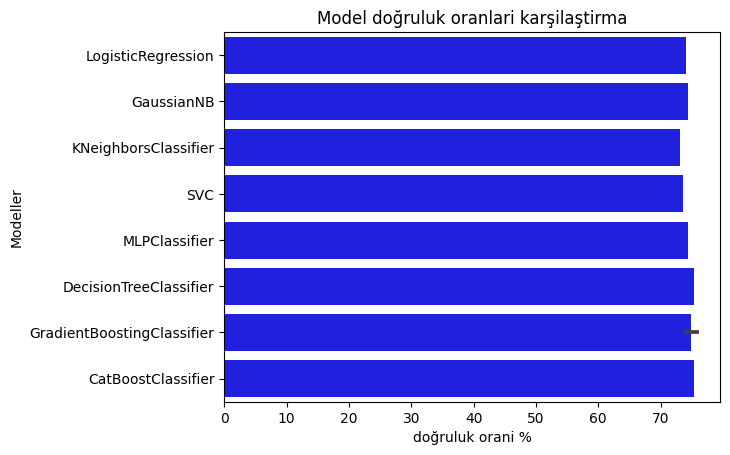

In [52]:
sns.barplot(x="doğruluk", y="modeller", data=scores, color="blue")
plt.xlabel("doğruluk orani %")
plt.ylabel("Modeller")
plt.title("Model doğruluk oranlari karşilaştirma");